In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pydicom

In [2]:
import cv2
import numpy as np

def quarterize_image(image):
    res = cv2.resize(image, dsize=(image.shape[1]//4, image.shape[0]//4), interpolation=cv2.INTER_CUBIC)
    return res


def quadruplicate_image(image):
    res = cv2.resize(image,dsize=(image.shape[1]*4, image.shape[0]*4), interpolation=cv2.INTER_CUBIC)
    return res

def decimate(image):
    res = cv2.resize(image, dsize=(image.shape[1]//10, image.shape[0]//10), interpolation=cv2.INTER_CUBIC)
    return res

In [3]:
def reduce_range(image):
    max_value = np.max(image)
    new_image = ((image /max_value)*255).astype('uint8')
    return new_image

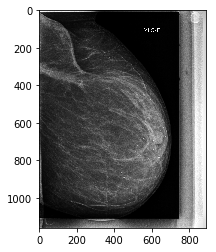

In [457]:
input_image = pydicom.read_file("/mnt/storage/Evidences/najara_issues/imagem2.dcm")
reduced_image = quarterize_image(input_image.pixel_array)
decimated_image = decimate(input_image.pixel_array)
plt.imshow(reduced_image, interpolation='nearest', cmap='gray')
plt.show()

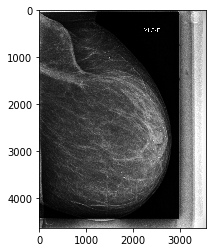

NameError: name 'entropy_gradient_column_crop' is not defined

In [4]:
input_image = pydicom.read_file("/mnt/storage/Evidences/najara_issues/imagem2.dcm")
reduced_image = quarterize_image(input_image.pixel_array)
decimated_image = decimate(input_image.pixel_array)
plt.imshow(input_image.pixel_array, interpolation='nearest', cmap='gray')
plt.show()
tmp = entropy_gradient_column_crop(entropy_gradient_row_crop(reduce_range(reduced_image)))
plt.imshow(tmp)
print(tmp.shape)
plt.show()

In [6]:
aa= np.array(35)

In [27]:
type(input_image.pixel_array.flat[0])

numpy.uint8

In [29]:
tentativa_de_abrir = np.fromfile("/tmp/entrada.img",dtype="ubyte",sep="")

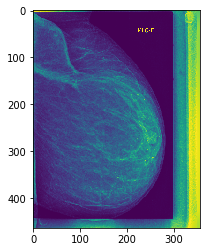

In [44]:

plt.imshow(decimated_image)
plt.show()

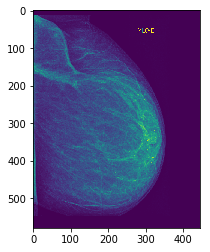

In [55]:
plt.imshow(np.fromfile("/tmp/batata.raw",dtype="ubyte").reshape(4640//8,3560//8))

In [51]:
len(np.fromfile("/tmp/sampleoutput.raw",dtype="ubyte"))/580

514.1793103448276

In [10]:
8*len(tentativa_de_abrir)

16518400

In [35]:
4640*3560

16518400

In [34]:
input_image.pixel_array.shape

(4640, 3560)

In [ ]:
das = open("/tmp.entrada.img","rb")
daba =

In [37]:
#np.save("/tmp/saida.coisa",input_image.pixel_array)
newFile =  open("/tmp/saida.coisa","wb")
#newFileByteArray = bytearray()
newFile.write(input_image.pixel_array.tobytes())

16518400

In [460]:
input_image.pixel_array.shape

(4640, 3560)

In [7]:
def largest_objects (image):    
    erosion_kernel = np.ones((3,3), np.uint16)
    dilated_image = cv2.erode(image.astype(np.uint8), erosion_kernel)   
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(dilated_image, connectivity=4)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    img2 = np.zeros(output.shape)
    img2[output == max_label] = 255
    return img2

def largest_negative_space(image):
    negate  = image < 1
    plt.show(negate)
    plt.imshow()
    

In [8]:
from PIL import Image
import numpy as np

def center_of_mass(image):
    centerx =0
    centery =0
    count =0
    for x in range(0,image.shape[1]):
        for y in range(0, image.shape[0]):
            if image[y][x] > 0:
                    count = count +1
                    centerx = centerx  + x
                    centery = centery +y
                    
    return (centery/count, centerx/count)

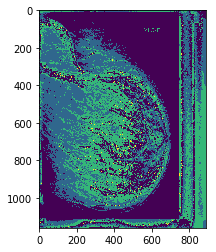

In [88]:
def flatten_value_range(image, families):
    ma = np.max(image)
    mi = np.min(image)
    ran = ma - mi
    depened = image - mi
    
    res = (depened*families)/ran
  
    return (res*255)//(255//families)

plt.imshow(flatten_value_range(reduced_image,3))
plt.show()

In [11]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

In [95]:
def entropy_col(image,col, width):
    target_image = image[:,col:col+width]
    a = entropy(target_image,disk(width))   
    return a.sum()/(target_image.shape[0]*target_image.shape[1])

In [214]:
def entropy_line(image,row,width):
    target_image = image[row:row+width, :]
    a = entropy(target_image,disk(width))
    return a.sum()/(target_image.shape[0]*target_image.shape[1])

In [222]:
entropy_of_slice = entropy(reduced_image[:,680:710],morpho.rectangle(10,10))
entropy_of_slice
np.max(entropy_of_slice)

0.0

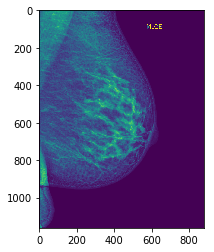

In [223]:
plt.imshow(reduced_image)
plt.show()

In [310]:
def sq_entropy(image,col, kernel_width, kernel_height):
    target_image = image[:,col:col+kernel_width]
    return entropy(target_image,morpho.rectangle(kernel_width,kernel_height))

def histogram_of_max_entropy(image,kernel_side):
    col_array=[]
    for c in range(kernel_side//2,image.shape[1]-(kernel_side//2),kernel_side):
        col_array.append(np.sum(sq_entropy(image,c,kernel_side,image.shape[0])))
    return col_array

def sq_row_entropy(image,row, kernel_width, kernel_height):
    target_image = image[row:row+kernel_height,:]
   
    return entropy(target_image,morpho.rectangle(kernel_width,kernel_height))

def histogram_of_max_row_entropy(image,kernel_side):
    rol_array=[]
    for c in range(kernel_side//2,image.shape[0]-(kernel_side//2),kernel_side):
        rol_array.append(np.sum(sq_row_entropy(image,c,image.shape[1],kernel_side)))
    return rol_array

In [306]:
def sq_entropy():
    pass

CPU times: user 272 ms, sys: 0 ns, total: 272 ms
Wall time: 493 ms


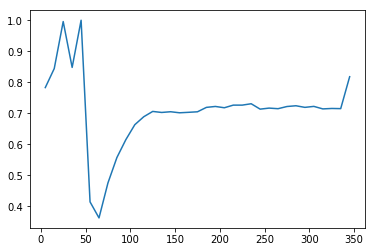

In [299]:
%time col_ent = histogram_of_max_entropy(decimated_image,10)
plt.plot([x for x in range(5,decimated_image.shape[1]-5,10)],col_ent/(np.max(col_ent)))
plt.show()

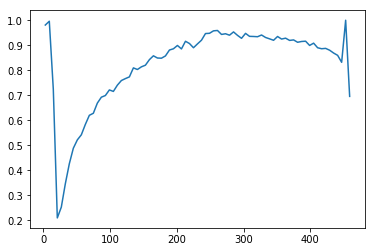

In [332]:
row_ent = histogram_of_max_row_entropy(decimated_image,6)
plt.plot([x for x in range(3,decimated_image.shape[0]-3,6)],row_ent/(np.max(row_ent)))
plt.show()

In [337]:
def histogram_by_local_minima_relevance(histogram):
    differences=[]
    for i in range(0,len(histogram)):
        prev = histogram[max(i-1,0)]
        prox = histogram[min(i+1,len(histogram)-1)]
        differences.append((prev - histogram[i]) +(prox - histogram[i]))
       
    return differences
    


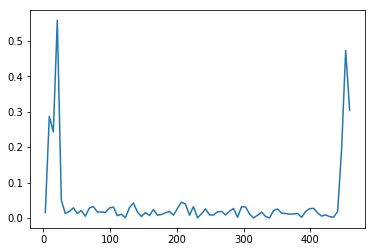

In [336]:
tmp = histogram_by_local_minima_relevance(row_ent)
plt.plot([x for x in range(3,decimated_image.shape[0]-3,6)],np.abs(tmp)/(np.max(row_ent)))
plt.show()

In [468]:
def entropy_gradient_column_crop(image):
    
    kernel_width = 6#2*image.shape[0]//100 # 2% window
    work_image = image
   
   
    hist  = histogram_of_max_entropy(image,kernel_width)                
    hist_local = histogram_by_local_minima_relevance(hist)
    relevant_data = np.abs(hist_local)/(np.max(hist))
    
    half = image.shape[1]/2
    
    lowest_upcrop =0
    highest_downcrop=image.shape[1]
    
    for a in range(0,len(relevant_data)):#derivatives)):
        if relevant_data[a] > 0.25 :                          
                index = a*(kernel_width) + kernel_width//2
                
                if index > half:
                    if highest_downcrop > index :
                        highest_downcrop = index
               
                else:
                    if lowest_upcrop < index :
                        lowest_upcrop = index
   
    return image[:,lowest_upcrop:highest_downcrop+kernel_width//2]

def entropy_gradient_row_crop(image):
    kernel_width = 6#2*image.shape[1]//100 # 3% window
    
    work_image = image
   
    '''for row in range(0,work_image.shape[0]-kernel_width,kernel_width//2):
        ent = entropy_line(work_image,row, kernel_width)
        res.append(ent)
    res= res /(np.max(res))   '''
   
    hist  = histogram_of_max_row_entropy(image,kernel_width)                
    hist_local = histogram_by_local_minima_relevance(hist)
    #plt.plot([x for x in range(3,decimated_image.shape[0]-3,6)],np.abs(hist_local)/(np.max(hist)))
    #plt.show()          
    relevant_data = np.abs(hist_local)/(np.max(hist))
    print(relevant_data)
    half = image.shape[0]/2
    
    lowest_upcrop =0
    highest_downcrop=image.shape[0]        
    
    
    for a in range(0,len(relevant_data)):#derivatives)):
        
        if relevant_data[a] > 0.2:                       
                index = a*(kernel_width) + kernel_width//2
                
                if index > half:
    
                    if highest_downcrop > index :
                        highest_downcrop = index
               
                else:
    
                    if lowest_upcrop < index :
                        lowest_upcrop = index   
    
    return  image[lowest_upcrop:highest_downcrop+kernel_width//2,:]

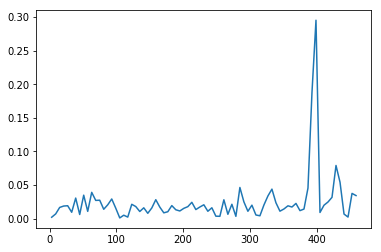

[0.0019 0.0068 0.0165 0.0186 0.019  0.0093 0.0304 0.006  0.0348 0.0107
 0.039  0.027  0.0273 0.0138 0.0204 0.0291 0.0154 0.0009 0.005  0.0021
 0.0212 0.0178 0.0105 0.016  0.0078 0.0157 0.028  0.017  0.0085 0.0101
 0.0192 0.013  0.0112 0.0152 0.0177 0.0241 0.0133 0.0171 0.0205 0.0108
 0.016  0.0035 0.0033 0.0279 0.0063 0.0212 0.0033 0.0462 0.0248 0.0108
 0.0199 0.0053 0.0041 0.0201 0.0336 0.0438 0.0235 0.0109 0.0142 0.0189
 0.0171 0.0225 0.0118 0.0141 0.0454 0.1876 0.2952 0.009  0.0198 0.0246
 0.0316 0.079  0.0541 0.0067 0.0022 0.0374 0.0342]


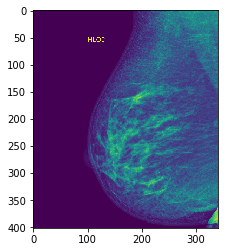

In [396]:
plt.imshow(entropy_gradient_column_crop(entropy_gradient_row_crop(decimated_image)))
plt.show()

In [289]:

def enhanced_entropy_based_column_crop(image):
    kernel_width = 3*image.shape[0]//100 # 3% window
    work_image = image
    res = []
   
    for col in range(0,work_image.shape[1]-kernel_width,kernel_width//2):
        ent = entropy_col(work_image,col, kernel_width)
        res.append(ent)
    res= res /(np.max(res))
   
                    
   
    half = image.shape[1]/2
    
    lowest_upcrop =0
    highest_downcrop=image.shape[0]
    
    for a in range(1,len(res)):#derivatives)):
        if res[a] < 0.4 :#derivatives[a] > 0.2:                          
                index = a*(kernel_width//2)
                
                if index > half:
                    if highest_downcrop > index :
                        highest_downcrop = index
               
                else:
                    if lowest_upcrop < index :
                        lowest_upcrop = index
   
    return image[:,lowest_upcrop:highest_downcrop+kernel_width//2]

def enhanced_entropy_based_row_crop(image):
    kernel_width = 3*image.shape[1]//100 # 3% window
    work_image = image
    res = []
    for row in range(0,work_image.shape[0]-kernel_width,kernel_width//2):
        ent = entropy_line(work_image,row, kernel_width)
        res.append(ent)
    res= res /(np.max(res))   
    
                   
   
    half = image.shape[0]/2
    
    lowest_upcrop =0
    highest_downcrop=image.shape[0]
    
    for a in range(1,len(res)):#derivatives)):
        if res[a] < 0.5 :#derivatives[a] > 0.2:                          
                index = a*(kernel_width//2)
                
                if index > half:
                    if highest_downcrop > index :
                        highest_downcrop = index
               
                else:
                    if lowest_upcrop < index :
                        lowest_upcrop = index
    print("highest:" + str(highest_downcrop))               
    return  image[lowest_upcrop:highest_downcrop+kernel_width//2,:]
    


highest:1160


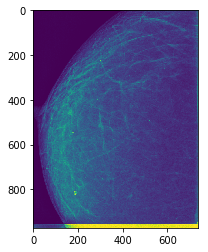

In [290]:
f = enhanced_entropy_based_row_crop(enhanced_entropy_based_column_crop(reduced_image))
plt.imshow(f)
plt.show()

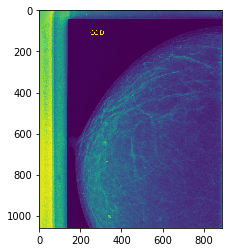

In [277]:
plt.imshow(reduced_image[0:1060,:])
plt.show()

In [278]:
reduced_image.shape

(1160, 890)

In [19]:
from numpy import diff

In [84]:
dx = 20
y = res
dy = diff(y)/1#dx
dy.shape

(43,)

In [79]:
resbackup= res.copy()

In [80]:
res =res / np.max(res)

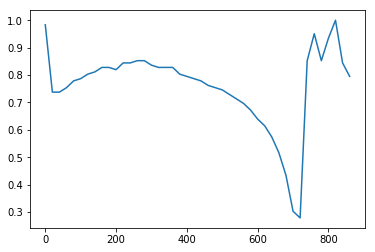

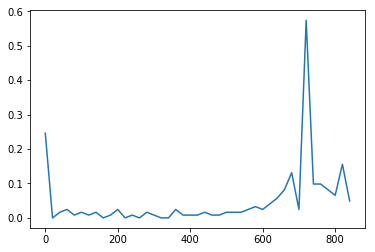

In [85]:
plt.plot([x for x in range(0,reduced_image.shape[1]-20,20)],res)
plt.show()
plt.plot([x for x in range(0,reduced_image.shape[1]-40,20)],np.abs(dy))
plt.show()

NameError: name 'd' is not defined

In [17]:


print(dy)


[-1.5   0.    0.1   0.15  0.05  0.1   0.05  0.1   0.   -0.05  0.15  0.
  0.05  0.   -0.1  -0.05  0.    0.   -0.15 -0.05 -0.05 -0.05 -0.1  -0.05
 -0.05 -0.1  -0.1  -0.1  -0.15 -0.2  -0.15 -0.25 -0.35 -0.5  -0.8  -0.15
  3.5   0.6  -0.6   0.5   0.4  -0.95 -0.3 ]


In [188]:
smallest_entropy = 9999999
smallest_col =0
for col in range(0,reduced_image.shape[1]-20,10):
    ent = entropy_col(reduced_image,col, 20)
    if ent < smallest_entropy:
        smallest_entropy = ent
        smallest_col = col
print(smallest_col)

710


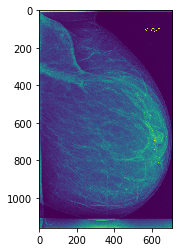

In [190]:
faker = reduced_image[:,0:710]
plt.imshow(faker)
plt.show()

In [201]:
sample_image = np.array([1,1,1,1,0,1,1,1,1]).reshape((3,3))
sample_image


array([[1, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [204]:
import skimage.morphology as morpho
morpho.rectangle(3,3)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [211]:
import math

In [212]:
def diy_entropy(image):
    acc =0.0
    dic = {}
    for a in image.flat:
        try:
            dic[a]= dic[a]+1
        except KeyError:
            dic[a]=1
    for e in dic:
        pe = dic[e]/len(image.flat)
        acc = acc + pe * math.log(pe,2)
    return  -1*acc

In [213]:
diy_entropy(sample_image)

0.5032583347756457

In [205]:
entropy(sample_image,morpho.rectangle(3,3))

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:126: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:179: UserWarning: Downcasting int64 to uint8 without scaling because max value 1 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


array([[0.8113, 0.65  , 0.8113],
       [0.65  , 0.5033, 0.65  ],
       [0.8113, 0.65  , 0.8113]])

In [208]:
f={}
f[3]=1
for a in f:
    print(a)

3


In [ ]:
 target_image = image[:,col:col+width]
    a = entropy(target_image,disk(width))   
    return a.sum()/(target_image.shape[0]*target_image.shape[1])

In [163]:
find_longest_black_column(reduced_image)

(0, 1)

In [109]:
def border_detection(oriimage,limit,families):
    
    image = flatten_value_range(oriimage,families)
    
    result = np.ones(image.shape[0]*image.shape[1]).reshape(image.shape)
    
    for line in range (0, image.shape[0]):
        starting_value = image[line][0]
        for column in range (1, image.shape[1]):
            if starting_value  != image[line][column]:
                starting_value = image[line][column]
                result[line][column] = 0
    for columns in range (0, image.shape[1]):
        starting_value = image[0][column]
        for line in range (1, image.shape[0]):
            if starting_value  != image[line][column]:
                starting_value = image[line][column]
                result[line][column] = 0
    return result
    
    # horizontal scan

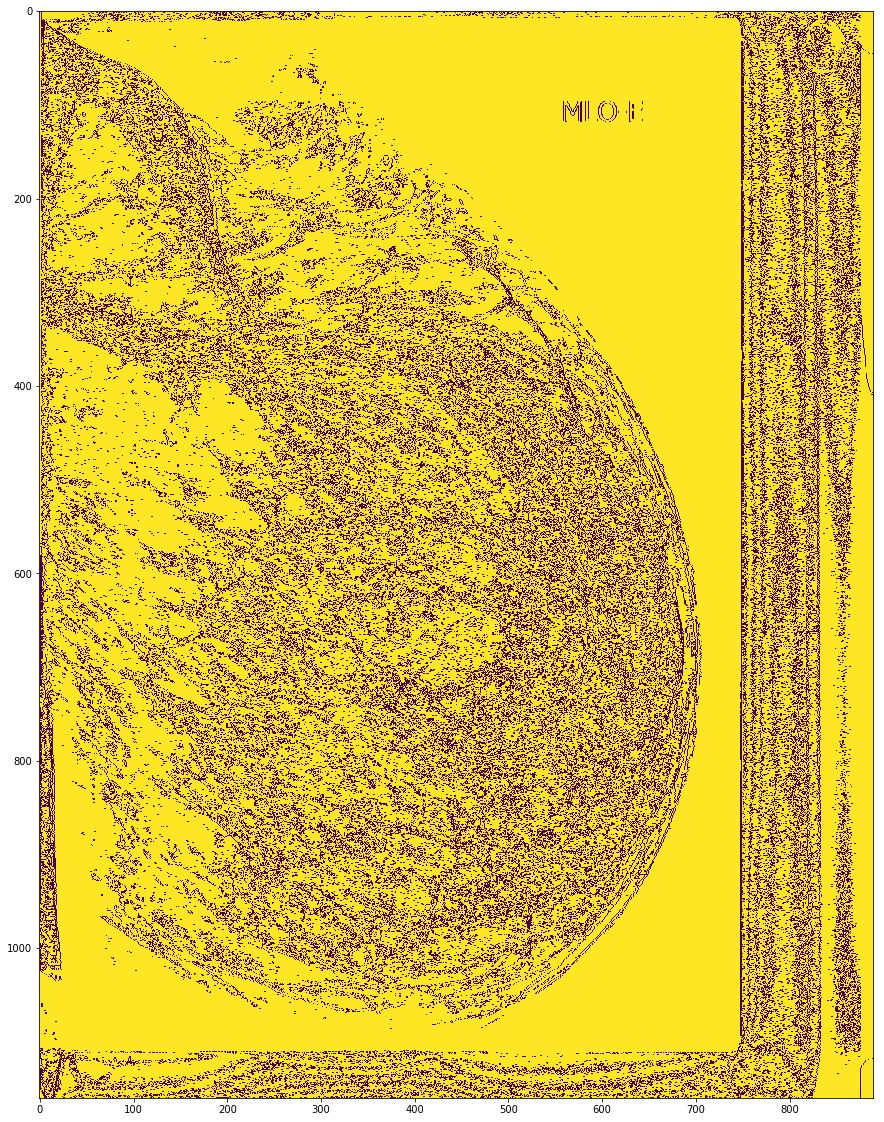

In [110]:
borderized = border_detection(reduced_image, 0, 3)
plt.figure(figsize=(20,20))
plt.imshow(borderized)
plt.show()


https://pdfs.semanticscholar.org/ef82/857a6ea191d2ffc45409035b20cccc61f644.pdf

In [112]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte



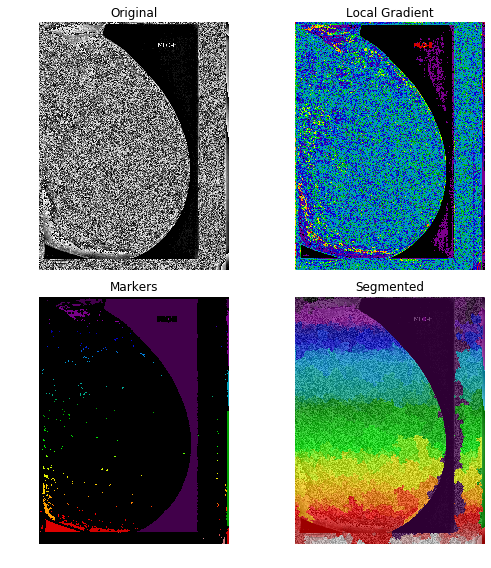

In [121]:

image = flatten_value_range(reduced_image,15).astype('int8')

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [108]:
def leftmost_boundary(image):
    for x in range (0, image.shape[1]):
        for y in range(0, image.shape[0]):
            if image[y][x] == 0:
                return (y,x)
            

In [111]:
leftmost_boundary(borderized)

(568, 1)

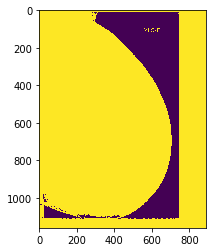

In [7]:
binary_image = reduced_image > 2*np.max(reduced_image)/100
plt.imshow(binary_image)
plt.show()

In [ ]:
def find_largest_continuous_column_group_at_least_25percent_empty(image):
    

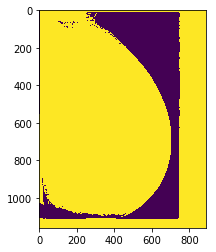

In [18]:
larg =largest_objects(binary_image)
plt.imshow(larg)
plt.show()

In [32]:
n = reduced_image < 10
center_of_mass(n)

(470.7906152417926, 565.7475537771865)

In [14]:
np.max(reduced_image)

255

In [462]:
(511//2)*2

510